Accuracy of Decision Tree on winequality-red: 0.7875
Accuracy of Decision Tree on winequality-white: 0.7816326530612245


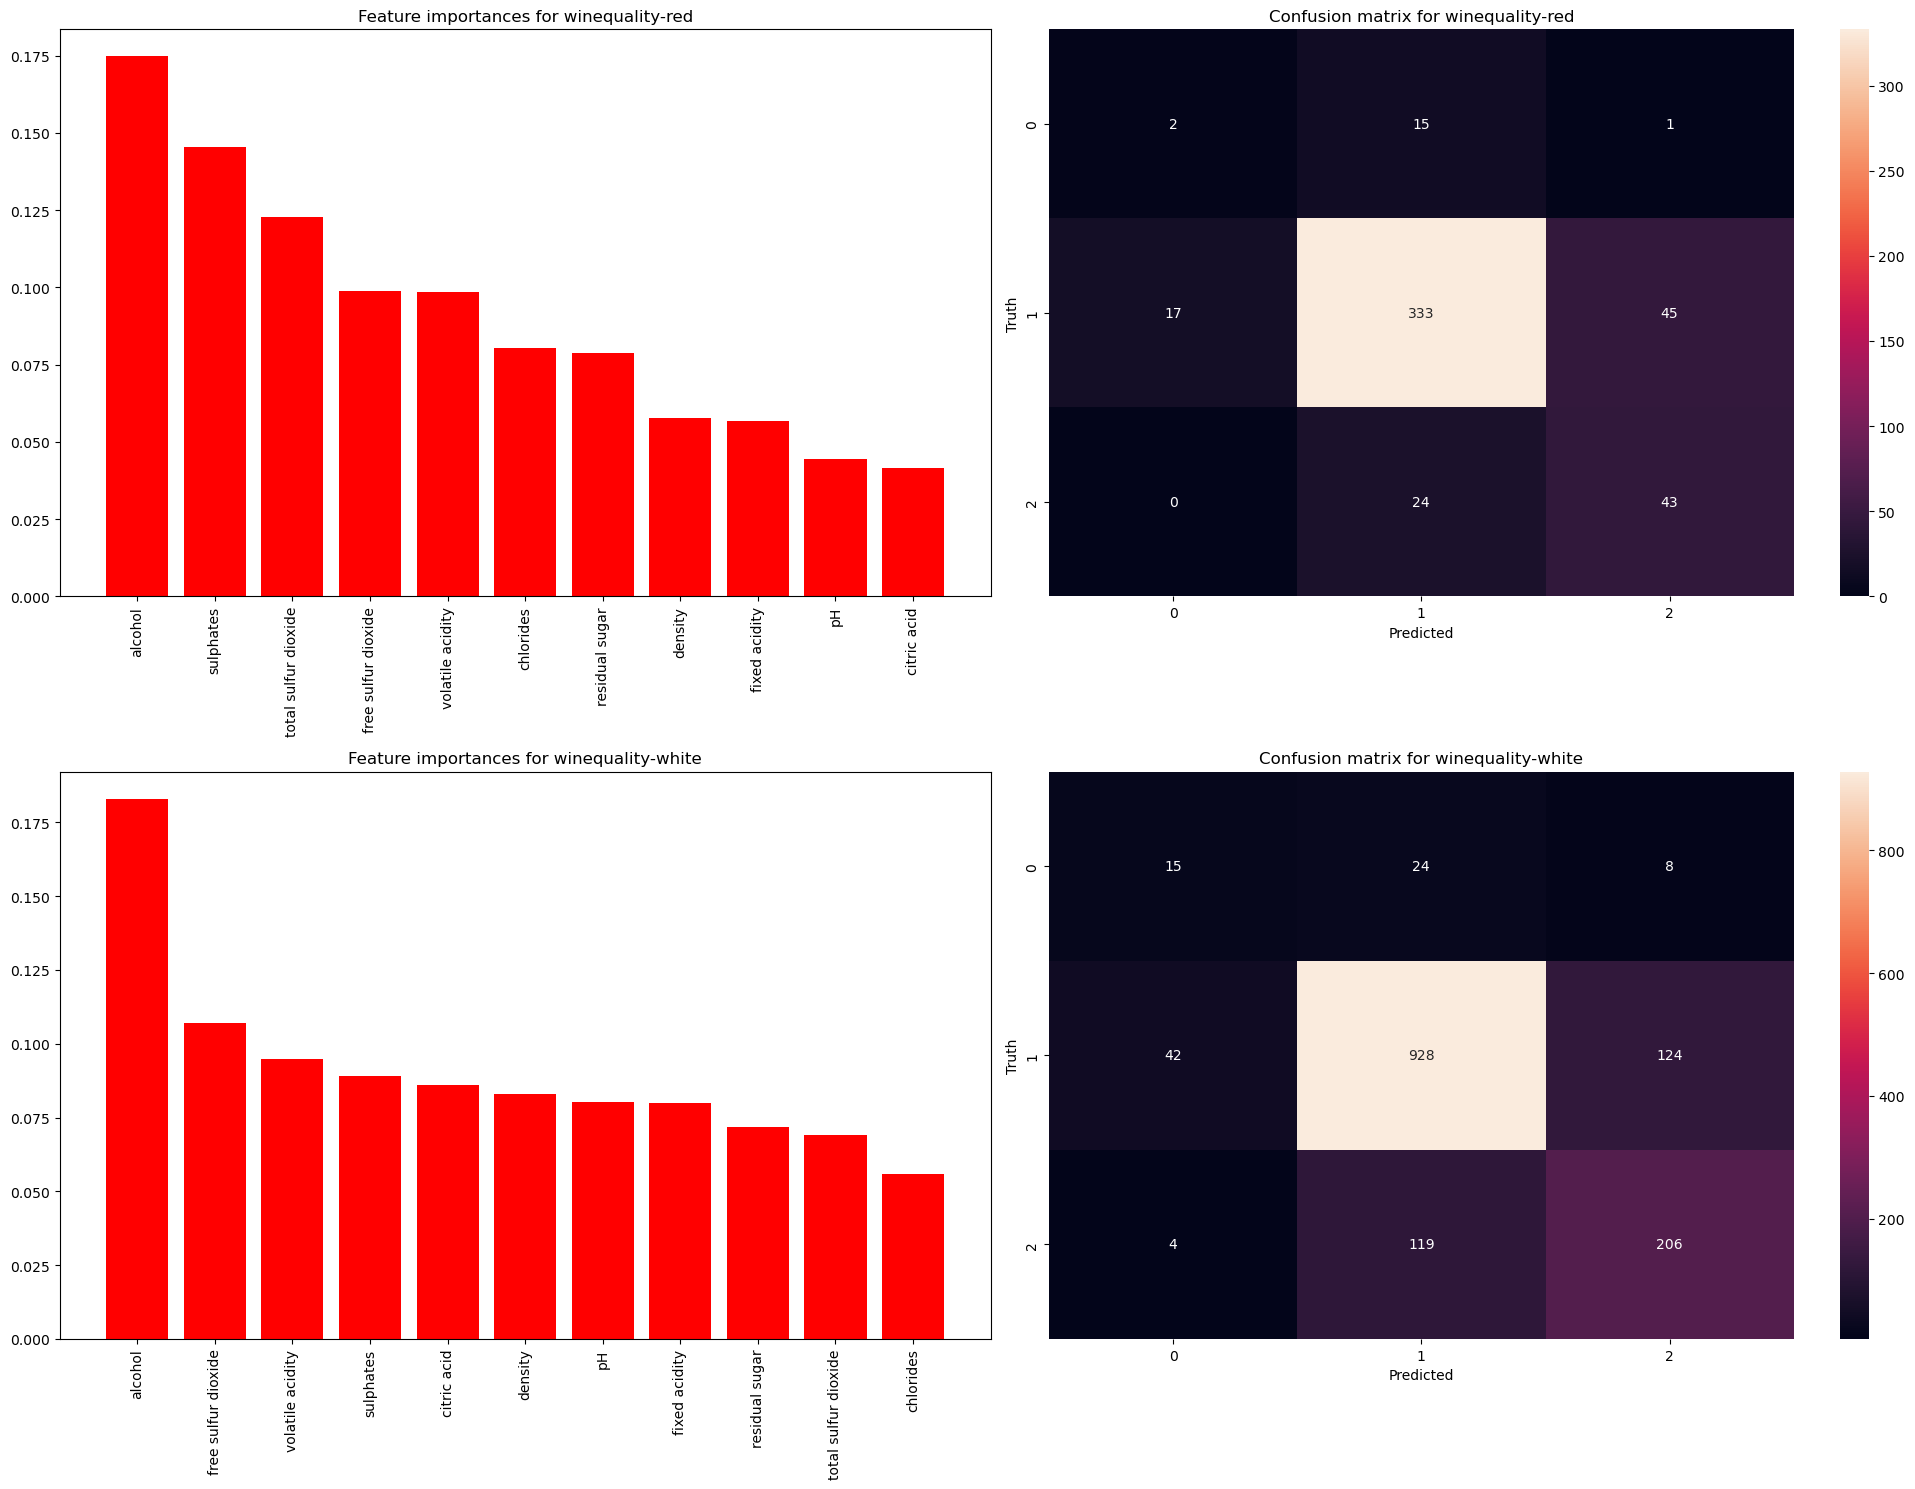

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

The accuracy is high. The classifier is really good at predicting the quality of the wine. 

We can also see that importance of the features in the model. The most important feature is alcohol, followed by sulphates and volatile acidity for Red Wine. The least important feature is free sulfur dioxide.

In the case of White Wine, the most important feature is alcohol, followed by Volatile acidity and Free sulfur dioxide. The least important feature is sulphates.

The confusion matrix shows that the classifier classified most of the wine correctly. However we clearly can se here (as well as in visualization of the data) that the biggest group is the for quality from 5 to 7. The same groups is also the biggest in terms of quantity in the datasets.  

# Test with only rank 1 features

The following test is only with rank 1 features which were chosen with RFE (Recursive Feature Elimination). The features were chosen with the following code:
- Red: [`alcohol`, `density`, `sulphates`, `total sulfur dioxide`, `volatile acidity`]
- White: [`alcohol`, `density`, `free sulfur dioxide`, `residual sugar` ,`total sulfur dioxide`]


Accuracy of Decision Tree on winequality-red: 0.7958333333333333
Accuracy of Decision Tree on winequality-white: 0.7517006802721088


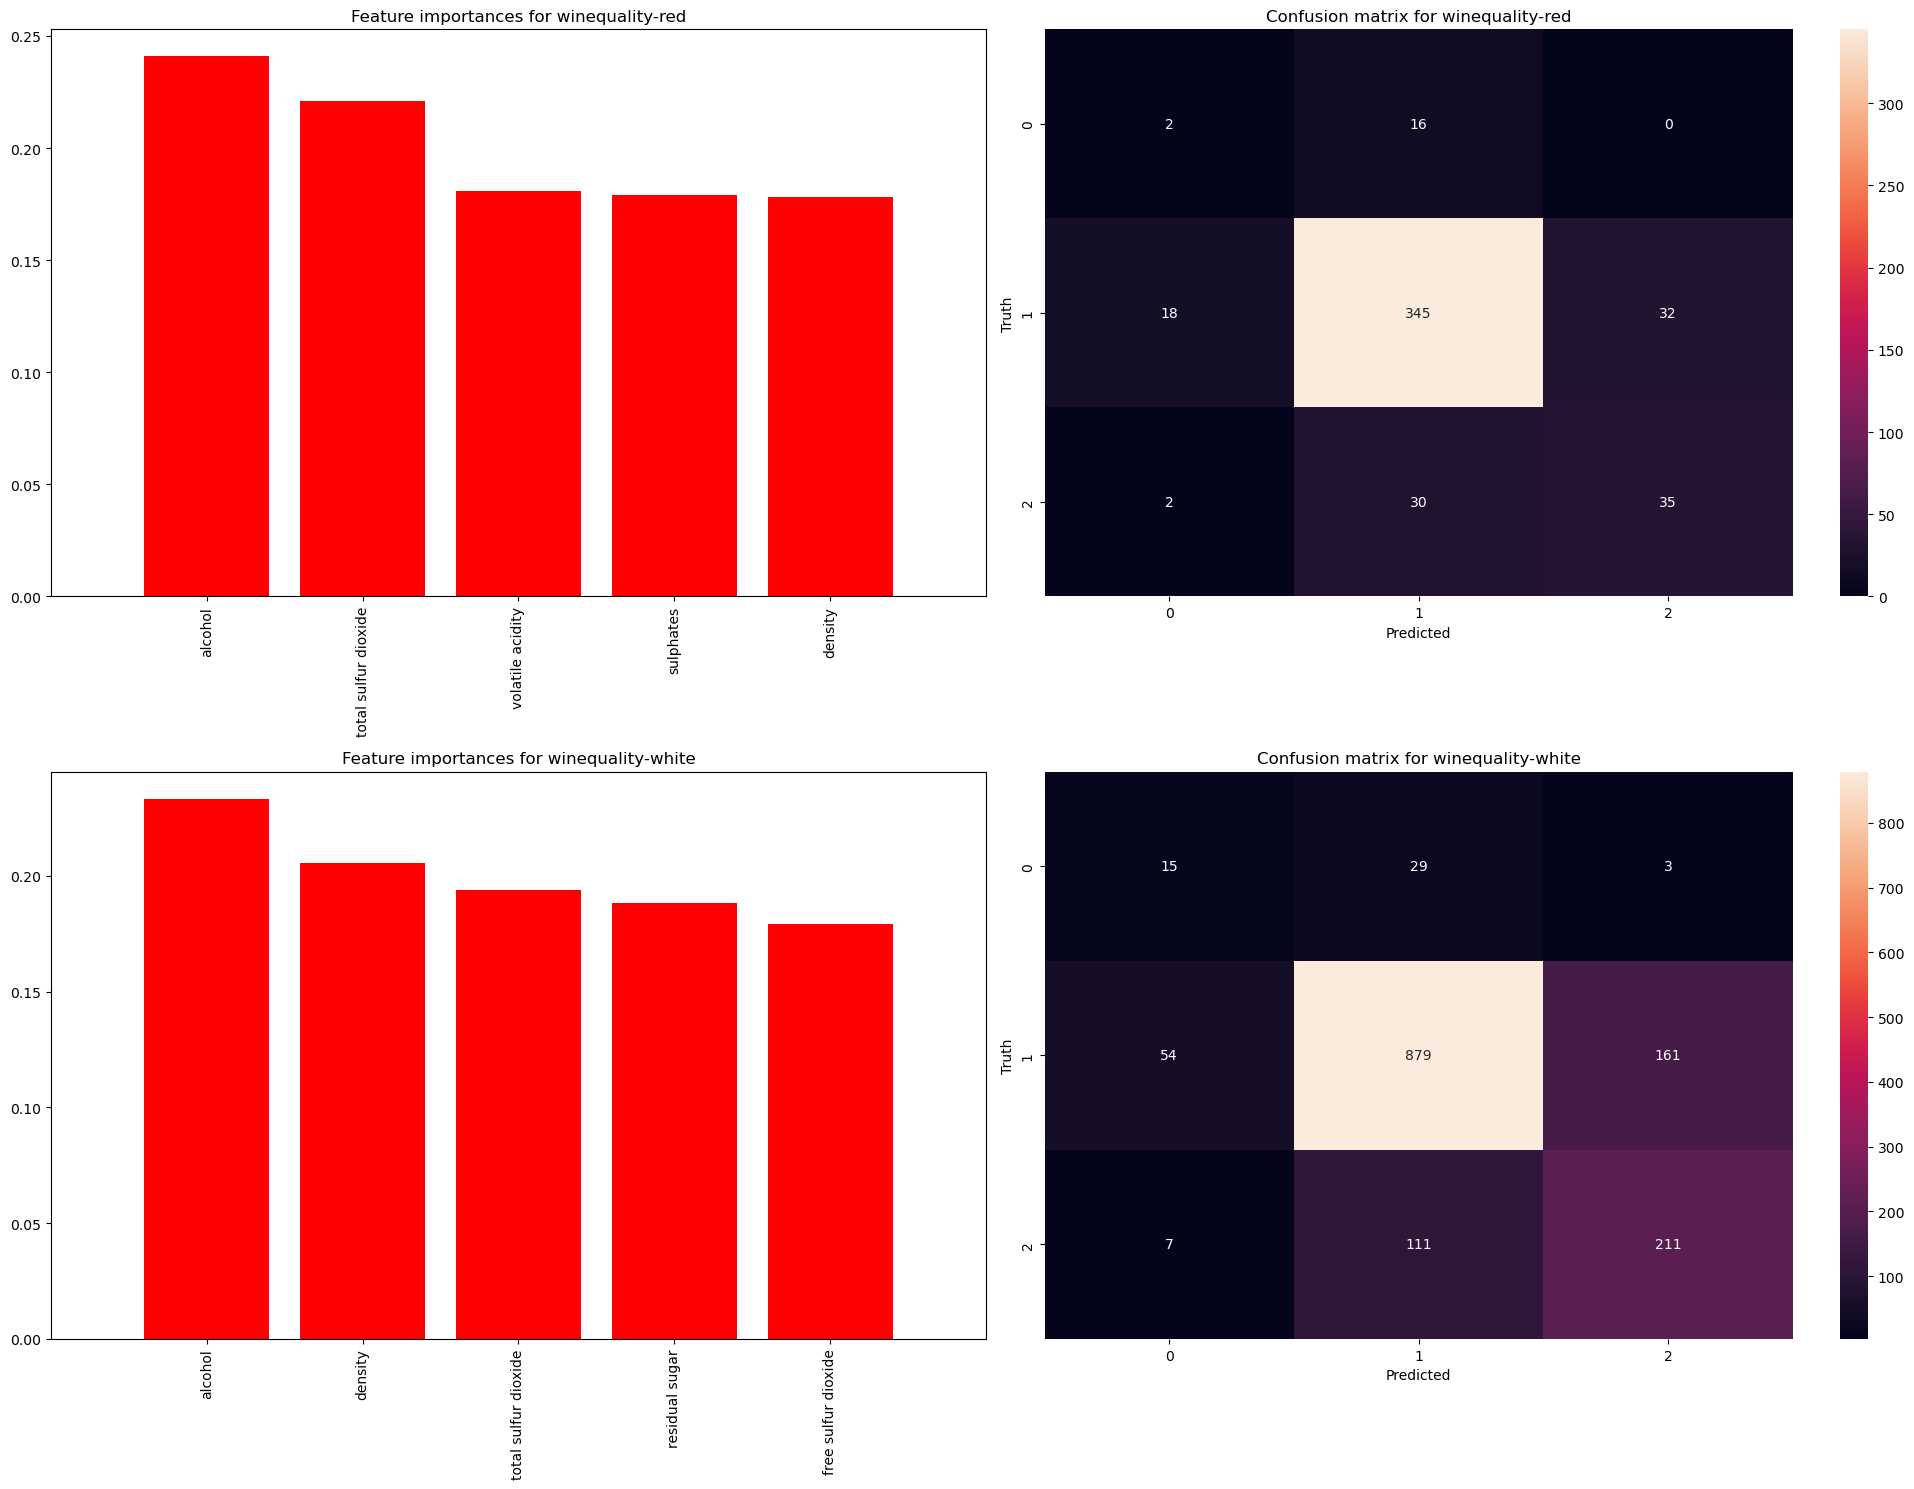

In [4]:
fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

After cutting only to the features that are important for the classifier, we can see that the accuracy is still high. The accuracy did not change much. Unfortunately, the way the data is distributed, it is hard to say if the classifier is really good or not. The accuracy is high, but the data is not balanced. The classifier is good at predicting the quality of the wine, but it is not good at predicting the quality of the wine that is not in the middle range.

# Test with dataset with balanced data (SMOTE method)

Now we will try to balance the data with SMOTE method. We will still consider only rank 1 features.  

Accuracy of Decision Tree on winequality-red: 0.8535353535353535
Accuracy of Decision Tree on winequality-white: 0.8285714285714286


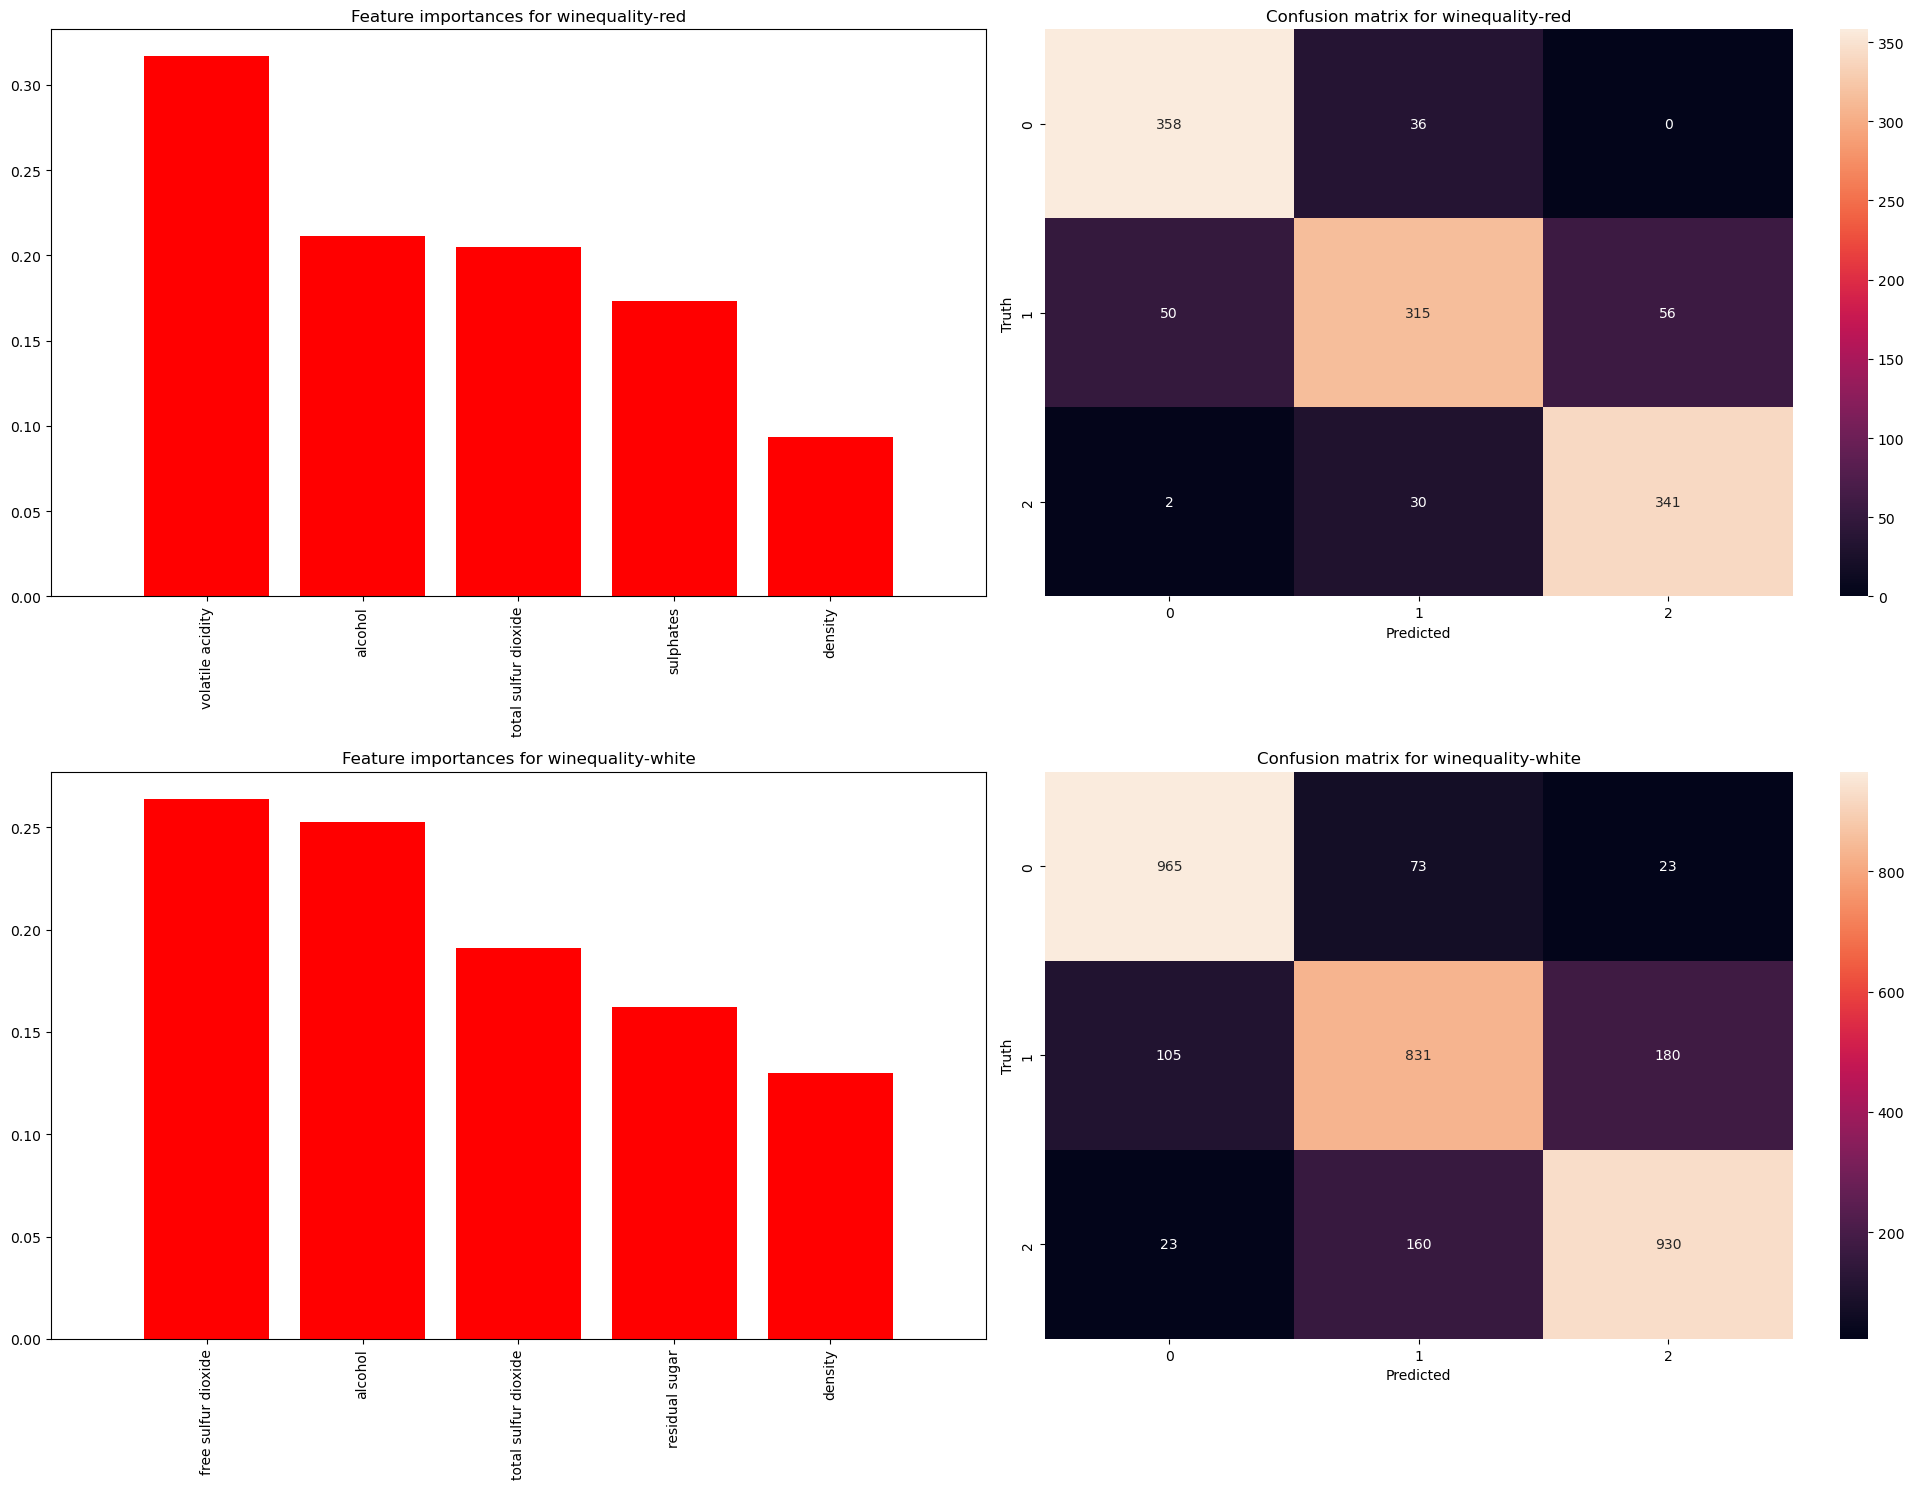

In [5]:
from imblearn.over_sampling import SMOTE

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    sm = SMOTE(random_state=42)
    X, y = sm.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

We defeniately can see that the accuracy is higher as well as the confusion matrix looks better. 